In [1]:
import tensorflow as tf
import numpy as np
# from tensorflow import keras

In [6]:
mnist = tf.keras.datasets.mnist

In [28]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

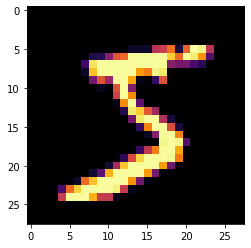

In [29]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='inferno')


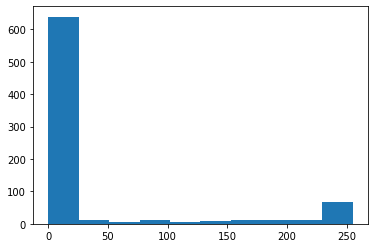

In [21]:
plt.hist(x_train[0].reshape(-1))
plt.show()

In [23]:
x_train =  x_train/255.0
x_test = x_test/ 255.0

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [25]:
class customCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch,logs={}):
        print('\nepoch',epoch)
        print('logs:',logs)
        if(logs.get('accuracy')>0.99):
            print('\nReached 99% accuracy so cancelling training!')
            self.model.stop_training=True
callbacks = customCallback()

In [30]:
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,callbacks=[callbacks])


Train on 60000 samples
Epoch 1/5
59584/60000 [============================>.] - ETA: 0s - loss: 2.9315 - accuracy: 0.8862
epoch 0
logs: {'loss': 2.9152728368329552, 'accuracy': 0.8864}
60000/60000 [==============================] - 7s 122us/sample - loss: 2.9153 - accuracy: 0.8864
Epoch 2/5
59680/60000 [============================>.] - ETA: 0s - loss: 0.3421 - accuracy: 0.9259
epoch 1
logs: {'loss': 0.34179498748520853, 'accuracy': 0.9260333}
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3418 - accuracy: 0.9260
Epoch 3/5
59840/60000 [============================>.] - ETA: 0s - loss: 0.2855 - accuracy: 0.9345
epoch 2
logs: {'loss': 0.2858398007664674, 'accuracy': 0.93451667}
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2858 - accuracy: 0.9345
Epoch 4/5
59488/60000 [============================>.] - ETA: 0s - loss: 0.2537 - accuracy: 0.9422
epoch 3
logs: {'loss': 0.2536999496812001, 'accuracy': 0.9421833}
60000/60000 [==============

In [32]:
history=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.2726 - accuracy: 0.9413


In [34]:
print('loss:',history[0])
print('acc:',history[1])

loss: 0.27259028105922045
acc: 0.9413
